In [3]:
import torchvision
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
from PIL import Image
import matplotlib.pyplot as plt
import random


1080
/home/dank/sethust/fil/AIGC/AIGI/AI-1k/images/deepai_1_10_1_0.jpg
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x76921CC924B0>


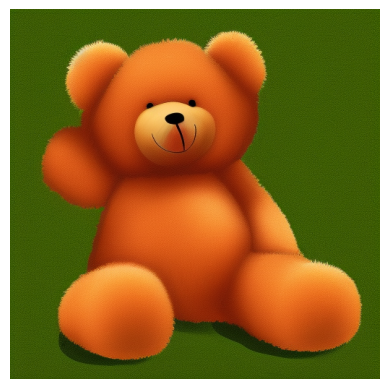

In [21]:
# Function to find all ".png" or ".jpg" files in a directory
def find_image_files(directory):
    image_files = []
    for file in os.listdir(directory):
        if file.endswith(".png") or file.endswith(".jpg"):
            image_files.append(os.path.join(directory, file))
    return image_files

directory_path = "/home/dank/sethust/fil/AIGC/AIGI/AI-1k/images"

# Get list of image files in the directory
image_files = find_image_files(directory_path)
print(len(image_files))
print(image_files[0])
random_image_file = random.choice(image_files)

# Visualize 
image = Image.open(random_image_file)
print(image)
plt.imshow(image)
plt.axis('off')
plt.show()

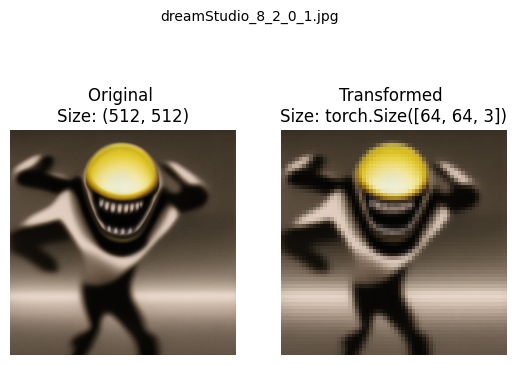

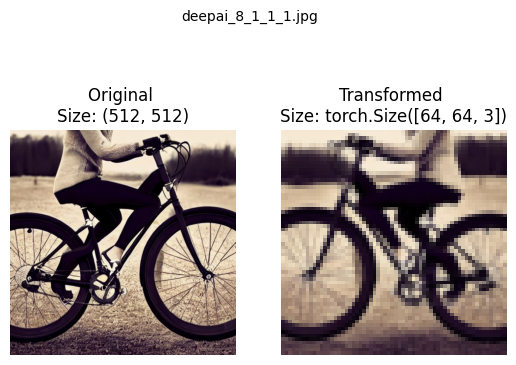

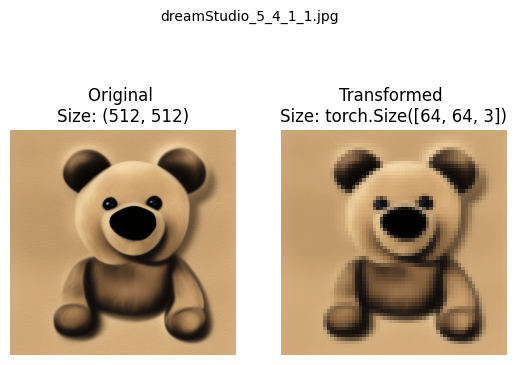

In [26]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"{os.path.basename(image_path)}", fontsize=10)

plot_transformed_images(image_files, 
                        transform=data_transform, 
                        n=3)

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)